# OpenCV、Dlib、MediaPipeを用いた画像認識

ここでは、カメラから取得した映像を用いて画像認識を行い、
必要な情報を取得するための流れを学ぶことで、
画像認識をビジネス現場で応用するイメージをつかみます。

以下のコードを参考に、画像認識の基本的な操作を理解してください。
各教材を解きながら、OpenCV、dlib、mediapipeの使い方、画像処理の流れをつかんでください。

### 画像データを読み込む

画像幅: 1920
画像高さ: 1440


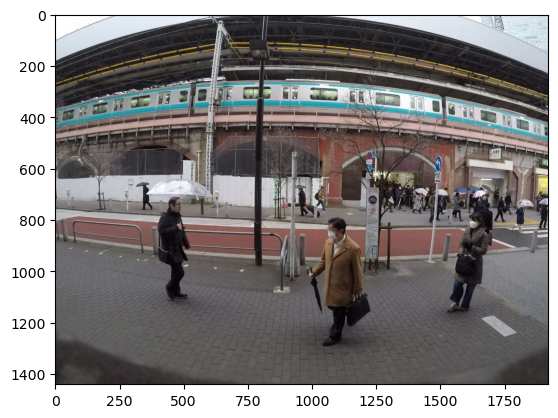

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img/img01.jpg")
height, width = img.shape[:2]
print("画像幅: " + str(width))
print("画像高さ: " + str(height))

# OpenCV が画像を扱う際に色の並びが RGB ではなく BGR
# 画像を matplotlib で表示させる前に BGR の並びを RGB に変換する
converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(converted_img)

### ファイルから映像データを読み込む

以下の主要な部分があります：

1. 動画ファイルを開く
2. 動画の基本情報（幅、高さ、フレーム数、FPS）の取得と表示
3. メインループでの動画処理：
    * フレームの読み込み
    * フレームのリサイズ
    * リサイズしたフレームの表示
4. 'q'キーでループ終了
5. リソースの解放

In [ ]:
# 必要なライブラリをインポート
import cv2 
import matplotlib.pyplot as plt 

# 動画ファイルを開く
cap = cv2.VideoCapture("vtest.avi")  # 'vtest.avi' という名前の動画ファイルを開く

# 動画の基本情報を取得
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # フレームの幅を取得
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # フレームの高さを取得
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)  # 総フレーム数を取得
fps = cap.get(cv2.CAP_PROP_FPS)  # フレームレート（FPS）を取得

# 取得した動画情報を表示
print("画像幅: " + str(width)) 
print("画像高さ: " + str(height)) 
print("総フレーム数: " + str(count)) 
print("FPS: " + str(fps)) 

# メインループ：動画の各フレームを処理
while(cap.isOpened()): 
    ret, frame = cap.read()  # 1フレームずつ読み込む。retはフレームの読み込みが成功したかどうか、frameは読み込んだフレーム
    
    if ret:  # フレームの読み込みが成功した場合
        # フレームのサイズを半分に縮小
        resized_frame = cv2.resize(frame, (int(width // 2), int(height // 2)))
        
        # 縮小したフレームを表示
        cv2.imshow("frame", resized_frame) 
    
    # 'q'キーが押されたらループを終了
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break 

# リソースの解放
cap.release()  # VideoCaptureオブジェクトを解放
cv2.destroyAllWindows()  # すべてのOpenCVウィンドウを閉じる

画像幅: 3840.0
画像高さ: 2160.0
総フレーム数: 795.0
FPS: 29.97002997002997


### Webカメラから映像をデータを読み込む

In [4]:
# OpenCVライブラリをインポート
import cv2

# Webカメラ映像のキャプチャを開始
# 0は通常、PCに内蔵されているカメラを指す。外付けカメラを使用する場合は1や2などに変更する
# cv2.CAP_DSHOWは、Windowsでのパフォーマンス向上のために使用
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# キャプチャのプロパティを取得
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # フレームの幅を取得
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # フレームの高さを取得
fps = cap.get(cv2.CAP_PROP_FPS)             # フレームレート（FPS）を取得

# 取得したカメラのプロパティを表示
print("画像幅: " + str(width))
print("画像高さ: " + str(height))
print("FPS: " + str(fps))

# Webカメラからの映像を連続的に取得し表示するループ
while(cap.isOpened()):
    ret, frame = cap.read()  # フレームを1つ取得。retは取得成功フラグ、frameは取得した画像
    
    if ret:  # フレームの取得に成功した場合        
        # 取得したフレームを表示
        # "Webcam"は表示ウィンドウの名前
        cv2.imshow("Webcam", frame)
        
    # キー入力を1ミリ秒待機し、'q'キーが押されたかチェック
    # 0xFF == ord('q')は、押されたキーが'q'かどうかを確認
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  # 'q'キーが押されたらループを終了

# キャプチャに使用したリソースを解放
cap.release()

# 作成したすべてのOpenCVウィンドウを閉じる
cv2.destroyAllWindows()

画像幅: 640.0
画像高さ: 480.0
FPS: 0.0


### 映像を画像に分割し，保存する

主な構成要素は以下の通りです：

1. 動画ファイルを開く
2. フレーム番号の初期化
3. メインループでの動画処理：
    * フレームの読み込み
    * フレームの表示
    * スナップショットの保存
    * 'q'キーでループ終了のチェック
    * フレーム番号の更新
4. リソースの解放とウィンドウを閉じる

注意点：
1. このスクリプトは、カレントディレクトリに"snapshot"フォルダが存在することを前提としています。フォルダが存在しない場合、エラーが発生する可能性があります。
2. 動画の各フレームが保存されるため、長い動画や高解像度の動画の場合、大量のディスク容量を使用する可能性があります。

In [ ]:
# OpenCVライブラリをインポート
import cv2

# 動画ファイルを開く
cap = cv2.VideoCapture("vtest.avi")  # 'vtest.avi' という名前の動画ファイルを開く

# フレーム番号の初期化
num = 0

# 動画ファイルが正常に開かれている間、ループを続ける
while(cap.isOpened()):
    # フレームを1つ読み込む
    # retは読み込み成功フラグ、frameは読み込んだ画像データ
    ret, frame = cap.read()
    
    if ret:  # フレームの読み込みに成功した場合
        # 読み込んだフレームを表示
        cv2.imshow("frame", frame)
        
        # スナップショットの保存先ファイルパスを生成
        # ファイル名は"snapshot_数字.jpg"の形式
        filepath = f"snapshot/snapshot_{num}.jpg"
        
        # 現在のフレームをJPEG画像として保存
        cv2.imwrite(filepath, frame)
        
        # 'q'キーが押されたらループを終了
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # フレーム番号を1増やす
    num += 1

# VideoCaptureオブジェクトを解放
cap.release()

# すべてのOpenCVウィンドウを閉じる
cv2.destroyAllWindows()

### 画像内のどこに人がいるのかを検出する

OpenCVを使用して画像から人物を検出するためには，一般的にHOG (Histogram of Oriented Gradients) とSVM (Support Vector Machine) を使用した人物検出がよく利用されます．以下のコードは，OpenCVのHOGDescriptorを用いて画像から人物を検出する例です．

主な構成要素は以下の通りです：
1. OpenCVライブラリのインポート
2. HOG検出器の準備と設定
3. 画像の読み込みとグレースケール変換
4. 人物検出の実行
5. 検出結果の処理（矩形描画）
6. 結果の保存

注意点：
1. 検出結果は"temp.jpg"という名前で保存されます。既存のファイルがある場合は上書きされます。
2. HOGパラメータは画像や検出対象によって調整が必要な場合があります。

In [7]:
# OpenCVライブラリをインポート
import cv2

# HOG (Histogram of Oriented Gradients) 検出器の準備
# HOGは人物検出によく使われる特徴量です
hog = cv2.HOGDescriptor()

# デフォルトの人物検出用SVMを設定
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# HOG検出器のパラメータを設定
hogParams = {
    'winStride': (8, 8),    # 検出ウィンドウの移動ステップ
    'padding': (32, 32),    # 検出ウィンドウの周りのパディング
    'scale': 1.05,          # 画像ピラミッドのスケール
    'hitThreshold': 0      # 検出閾値
    # 'finalThreshold': 5     # 重複検出のフィルタリング閾値
}

# 画像の読み込み
img = cv2.imread("img/img01.jpg")

# グレースケールに変換（HOG検出器は通常グレースケール画像を使用）
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 人物検出の実行
# human: 検出された人物の座標 (x, y, width, height)
# r: 信頼度スコア（この例では使用していません）
human, r = hog.detectMultiScale(gray, **hogParams)

# 検出結果の処理
if (len(human) > 0):  # 人物が検出された場合
    for (x, y, w, h) in human:
        # 検出された人物を白い矩形で囲む
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,255,255), 3)

# 結果を画像ファイルとして保存
cv2.imwrite("temp.jpg", img)

True

### 画像内の人の顔を検出する

OpenCVライブラリを使用して画像内の顔を検出し、検出された顔の周りに赤い矩形を描画します。具体的には、Haar Cascade分類器を用いて顔検出を行い、結果を視覚化して新しい画像ファイルとして保存します。

主な処理の流れは以下の通りです：
1. 顔検出用の分類器をロード
2. 画像ファイルを読み込みグレースケールに変換
3. 顔検出を実行
4. 検出された顔の位置に矩形を描画
5. 結果を新しい画像ファイルとして保存

In [8]:
# OpenCVライブラリをインポート
import cv2

# 顔検出のための準備
# Haar Cascade分類器の XMLファイルを指定
cascade_file = "haarcascade_frontalface_alt.xml"
# 分類器をロード
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込みと顔検出
# 画像ファイルを読み込む
img = cv2.imread("img/img02.jpg")
# グレースケールに変換（顔検出はグレースケール画像で行う）
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 顔検出を実行（最小サイズを50x50ピクセルに設定）
face_list = cascade.detectMultiScale(gray, minSize=(50, 50))

# 検出した顔に矩形を描画
for (x, y, w, h) in face_list:
    color = (0, 0, 225)  # 赤色 (BGR形式)
    pen_w = 3  # 線の太さ
    # 顔の位置に矩形を描画
    cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness=pen_w)

# 結果を画像ファイルとして保存
cv2.imwrite("temp.jpg", img)

True

### 画像内の人がどこに顔を向けているのかを検出する

OpenCVとdlibライブラリを使用して、画像内の顔を検出し、顔のランドマーク（特徴点）を識別し、さらに顔の向きを推定します。顔認識システム、感情分析、AR（拡張現実）アプリケーションなどに活用できます。

主な機能は以下の通りです：
1. 顔検出：画像内の顔を検出し、矩形で囲みます。
2. ランドマーク検出：各顔に対して68個の特徴点（ランドマーク）を検出します。
3. 重心計算：顔の輪郭と内部のランドマークそれぞれの重心を計算します。
4. 顔の方向推定：2つの重心の相対位置から顔の左右の向きを推定します。
5. 視覚化：検出結果を元の画像上に描画し、新しい画像ファイルとして保存します。

In [9]:
# 必要なライブラリをインポート
import cv2
import dlib
import math

# 顔のランドマーク検出器と顔検出器の準備
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# 画像の読み込みと顔検出
img = cv2.imread("img/img02.jpg")
dets = detector(img, 1)  # 1はアップサンプリング回数

# 検出された各顔に対して処理
for k, d in enumerate(dets):
    # 顔のランドマークを検出
    shape = predictor(img, d)
    
    # 描画用の色とパラメータを設定
    color_f = (0, 0, 225)  # 顔領域の色 (赤)
    color_l_out = (255, 0, 0)  # 外側のランドマークの色 (青)
    color_l_in = (0, 255, 0)  # 内側のランドマークの色 (緑)
    line_w = 3  # 線の太さ
    circle_r = 3  # 円の半径
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1

    # 顔領域を矩形で囲み、顔番号を表示
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

    # 重心計算の準備
    num_of_points_out = 17  # 輪郭を構成するランドマークの数
    num_of_points_in = shape.num_parts - num_of_points_out  # 内側のランドマークの数
    gx_out = gy_out = gx_in = gy_in = 0  # 重心座標の初期化

    # 各ランドマークに対して処理
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        
        # ランドマークの描画と重心の計算
        if shape_point_count < num_of_points_out:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_out, line_w)
            gx_out += shape_point.x / num_of_points_out
            gy_out += shape_point.y / num_of_points_out
        else:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_in, line_w)
            gx_in += shape_point.x / num_of_points_in
            gy_in += shape_point.y / num_of_points_in

    # 重心位置を描画
    cv2.circle(img, (int(gx_out), int(gy_out)), circle_r, (0,0,255), line_w)  # 外側の重心 (赤)
    cv2.circle(img, (int(gx_in), int(gy_in)), circle_r, (0,0,0), line_w)  # 内側の重心 (黒)

    # 顔の方向を計算
    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta * 180 / math.pi
    print(f"顔方位:{theta} (角度:{radian}度)")

    # 顔の方向を画像に表示
    textPrefix = "   left " if radian < 0 else "   right "
    textShow = f"{textPrefix}{abs(radian):.1f} deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)

# 処理結果の画像を保存
cv2.imwrite("temp.jpg", img)

顔方位:0.06456096931747406 (角度:3.6990710631648662度)


True

### Webカメラから読み込んだ映像データから顔を検出する

Webカメラからのリアルタイム映像で顔検出、顔のランドマーク（特徴点）識別、および顔の向き推定を行います。

In [5]:
import cv2
import dlib
import math

# 顔のランドマーク検出器と顔検出器の準備
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Webカメラの映像キャプチャを開始
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# Webカメラからの映像を連続的に処理
while cap.isOpened():
    ret, frame = cap.read()  # フレームを取得
    if ret:
        # グレースケールに変換（顔検出の精度向上のため）
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # 顔検出を実行
        dets = detector(gray, 1)  # 1はアップサンプリング回数
        
        # 検出された各顔に対して処理
        for k, d in enumerate(dets):
            # 顔のランドマークを検出
            shape = predictor(frame, d)
            
            # 描画用のパラメータ設定
            color_f = (0, 0, 225)  # 顔領域の色 (赤)
            color_l_out = (255, 0, 0)  # 外側のランドマークの色 (青)
            color_l_in = (0, 255, 0)  # 内側のランドマークの色 (緑)
            line_w = 2  # 線の太さ
            circle_r = 2  # 円の半径
            fontType = cv2.FONT_HERSHEY_SIMPLEX
            fontSize = 1

            # 顔領域を矩形で囲み、顔番号を表示
            cv2.rectangle(frame, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
            cv2.putText(frame, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

            # 重心計算の準備
            num_of_points_out = 17  # 輪郭を構成するランドマークの数
            num_of_points_in = shape.num_parts - num_of_points_out  # 内側のランドマークの数
            gx_out = gy_out = gx_in = gy_in = 0  # 重心座標の初期化

            # 各ランドマークに対して処理
            for shape_point_count in range(shape.num_parts):
                shape_point = shape.part(shape_point_count)
                # ランドマークの描画と重心の計算
                if shape_point_count < num_of_points_out:
                    cv2.circle(frame, (shape_point.x, shape_point.y), circle_r, color_l_out, line_w)
                    gx_out += shape_point.x / num_of_points_out
                    gy_out += shape_point.y / num_of_points_out
                else:
                    cv2.circle(frame, (shape_point.x, shape_point.y), circle_r, color_l_in, line_w)
                    gx_in += shape_point.x / num_of_points_in
                    gy_in += shape_point.y / num_of_points_in

            # 重心位置を描画
            cv2.circle(frame, (int(gx_out), int(gy_out)), circle_r, (0, 0, 255), line_w)  # 外側の重心 (赤)
            cv2.circle(frame, (int(gx_in), int(gy_in)), circle_r, (0, 0, 0), line_w)  # 内側の重心 (黒)

            # 顔の方向を計算
            theta = math.asin(2 * (gx_in - gx_out) / (d.right() - d.left()))
            radian = theta * 180 / math.pi

            # 顔の方向を画像に表示
            textPrefix = "   left " if radian < 0 else "   right "
            textShow = f"{textPrefix}{abs(radian):.1f} deg."
            cv2.putText(frame, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)
        
        # 処理結果をリアルタイムで表示
        cv2.imshow("Webcam", frame)
    
    # 'q'キーが押されたらループを終了
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# リソースを解放してウィンドウを閉じる
cap.release()
cv2.destroyAllWindows()

### 検出した情報を統合し，タイムラプスを作る

入力動画からタイムラプス動画を生成し、同時に人物検出を行います。タイムラプス動画とは、長時間にわたって撮影された一連の写真や映像を、通常よりも速いペースで再生することで作成される映像技法です。この技法により、通常では目に見えないほどゆっくりとした変化や動きを、短時間で観察できるようになります。

主な機能は以下の通りです：
1. 動画読み込み：指定された動画ファイルを読み込みます。
2. タイムラプス生成：10フレームごとに1フレームを抽出し、新しい動画を作成します。
3. 人物検出：HOG（Histogram of Oriented Gradients）ディスクリプタを使用して、各フレームで人物を検出します。
4. 可視化：検出された人物の周りに白い矩形を描画します。
5. 出力：処理されたフレームを新しいタイムラプス動画として保存します。

In [3]:
import cv2

print("タイムラプス生成を開始します")

# 動画ファイルの読み込み
# cap = cv2.VideoCapture("mov/mov01.avi")  # 別の動画ファイルを使用する場合はこちらのコメントを解除
cap = cv2.VideoCapture("vtest.avi")

# 動画の基本情報を取得
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# HOG（Histogram of Oriented Gradients）人物検出器の設定
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {
    'winStride': (8, 8),    # 検出ウィンドウの移動ステップ
    'padding': (32, 32),    # 検出ウィンドウの周りのパディング
    'scale': 1.05,          # 画像ピラミッドのスケール
    'hitThreshold': 0      # 検出閾値
}

# タイムラプス動画の設定
movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')  # コーデックの設定
video = cv2.VideoWriter(movie_name, fourcc, 30, (width, height))  # 出力動画の設定

num = 0  # フレームカウンター
while(cap.isOpened()):
    ret, frame = cap.read()  # フレームを1つ読み込む
    if ret:
        if (num % 10 == 0):  # 10フレームごとに処理（タイムラプス効果）
            # グレースケールに変換（人物検出の精度向上のため）
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # 人物検出を実行
            human, r = hog.detectMultiScale(gray, **hogParams)
            
            if (len(human) > 0):  # 人物が検出された場合
                for (x, y, w, h) in human:
                    # 検出された人物を白い矩形で囲む
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            
            # 処理したフレームをタイムラプス動画に追加
            video.write(frame)
    else:
        break  # 動画の終わりに達したらループを終了
    
    num += 1  # フレームカウンターを増加

# リソースの解放
video.release()
cap.release()
cv2.destroyAllWindows()

print("タイムラプス生成を終了しました")

タイムラプス生成を開始します
タイムラプス生成を終了しました


### 顔検出（MediaPipeを用いた改良）
MediaPipeは内部で最適化されており、一般的にdlibより高速です。

In [ ]:
import cv2
import mediapipe as mp
import math
import numpy as np

# MediaPipeの顔検出と顔メッシュの初期化
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# 顔メッシュの設定
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=10,  # 最大検出顔数
    refine_landmarks=True,  # 虹彩のランドマークも含める
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Webカメラの映像キャプチャを開始
# cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap = cv2.VideoCapture("gopro.mp4")  # 'vtest.avi' という名前の動画ファイルを開く


# MediaPipeの重要なランドマークインデックス
# 顔の中心線上のポイント
NOSE_TIP = 1  # 鼻先
NOSE_BRIDGE = 6  # 鼻根
FOREHEAD = 10  # 額の中心
CHIN = 152  # 顎

# 左右の顔輪郭ポイント
LEFT_CHEEK = 234  # 左頬の端
RIGHT_CHEEK = 454  # 右頬の端
LEFT_EAR = 172  # 左耳付近
RIGHT_EAR = 397  # 右耳付近

# 目の端点
LEFT_EYE_OUTER = 33  # 左目の外側
LEFT_EYE_INNER = 133  # 左目の内側
RIGHT_EYE_INNER = 362  # 右目の内側
RIGHT_EYE_OUTER = 263  # 右目の外側

# 口の端点
LEFT_MOUTH = 61  # 口の左端
RIGHT_MOUTH = 291  # 口の右端

def calculate_face_direction(landmarks, w, h):
    """
    顔の向きを計算する関数
    MediaPipeのランドマークから顔のYaw角（左右の回転）を推定
    """
    # 重要なランドマークの座標を取得
    nose_tip = landmarks[NOSE_TIP]
    nose_tip_x = nose_tip.x * w
    
    # 左右の頬の座標
    left_cheek = landmarks[LEFT_CHEEK]
    right_cheek = landmarks[RIGHT_CHEEK]
    left_cheek_x = left_cheek.x * w
    right_cheek_x = right_cheek.x * w
    
    # 左右の目の内側の座標
    left_eye_inner = landmarks[LEFT_EYE_INNER]
    right_eye_inner = landmarks[RIGHT_EYE_INNER]
    left_eye_x = left_eye_inner.x * w
    right_eye_x = right_eye_inner.x * w
    
    # 顔の中心を計算
    face_center_x = (left_cheek_x + right_cheek_x) / 2
    face_width = abs(right_cheek_x - left_cheek_x)
    
    # 目の中心を計算
    eyes_center_x = (left_eye_x + right_eye_x) / 2
    
    # 鼻先の中心からのずれを計算
    nose_deviation = nose_tip_x - face_center_x
    
    # 目の中心と顔の中心のずれも考慮
    eyes_deviation = eyes_center_x - face_center_x
    
    # 総合的な顔の向きを計算（鼻と目の両方を考慮）
    total_deviation = (nose_deviation * 0.7 + eyes_deviation * 0.3)
    
    # 顔幅で正規化（-1から1の範囲に）
    if face_width > 0:
        normalized_deviation = (total_deviation / face_width) * 2
        # -0.8から0.8の範囲にクリップ（極端な値を避ける）
        normalized_deviation = max(-0.8, min(0.8, normalized_deviation))
        
        # 角度に変換（最大±45度程度）
        angle = normalized_deviation * 45
        
        return angle, face_center_x, nose_tip_x, eyes_center_x
    
    return 0, face_center_x, nose_tip_x, eyes_center_x

# Webカメラからの映像を連続的に処理
while cap.isOpened():
    ret, frame = cap.read()  # フレームを取得
    if ret:
        width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # フレームの幅を取得
        height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # フレームの高さを取得
        frame = cv2.resize(frame, (int(width // 4), int(height // 4)))
        # BGRからRGBに変換（MediaPipeはRGB形式を使用）
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # 顔メッシュの検出を実行
        mesh_results = face_mesh.process(rgb_frame)
        
        # 描画用のパラメータ設定
        color_f = (0, 0, 225)  # 顔領域の色 (赤)
        color_l_out = (255, 0, 0)  # 外側のランドマークの色 (青)
        color_l_in = (0, 255, 0)  # 内側のランドマークの色 (緑)
        line_w = 2  # 線の太さ
        circle_r = 3  # 円の半径
        fontType = cv2.FONT_HERSHEY_SIMPLEX
        fontSize = 0.7
        
        # 顔メッシュ結果がある場合
        if mesh_results.multi_face_landmarks:
            h, w, _ = frame.shape
            
            for face_idx, face_landmarks in enumerate(mesh_results.multi_face_landmarks):
                landmarks = face_landmarks.landmark
                
                # 主要なランドマークを描画
                # 鼻
                nose_tip_point = (int(landmarks[NOSE_TIP].x * w), int(landmarks[NOSE_TIP].y * h))
                cv2.circle(frame, nose_tip_point, circle_r + 2, (0, 0, 255), -1)  # 鼻先（赤）
                
                # 左右の頬
                left_cheek_point = (int(landmarks[LEFT_CHEEK].x * w), int(landmarks[LEFT_CHEEK].y * h))
                right_cheek_point = (int(landmarks[RIGHT_CHEEK].x * w), int(landmarks[RIGHT_CHEEK].y * h))
                cv2.circle(frame, left_cheek_point, circle_r, color_l_out, -1)
                cv2.circle(frame, right_cheek_point, circle_r, color_l_out, -1)
                
                # 目の内側
                left_eye_point = (int(landmarks[LEFT_EYE_INNER].x * w), int(landmarks[LEFT_EYE_INNER].y * h))
                right_eye_point = (int(landmarks[RIGHT_EYE_INNER].x * w), int(landmarks[RIGHT_EYE_INNER].y * h))
                cv2.circle(frame, left_eye_point, circle_r, color_l_in, -1)
                cv2.circle(frame, right_eye_point, circle_r, color_l_in, -1)
                
                # 顔の向きを計算
                angle, face_center_x, nose_x, eyes_center_x = calculate_face_direction(landmarks, w, h)
                
                # 顔の中心線を描画
                face_center_x_int = int(face_center_x)
                top_y = int(landmarks[FOREHEAD].y * h)
                bottom_y = int(landmarks[CHIN].y * h)
                cv2.line(frame, (face_center_x_int, top_y), (face_center_x_int, bottom_y), 
                        (255, 255, 0), 1, cv2.LINE_AA)  # 黄色の中心線
                
                # 鼻の位置を示す線
                cv2.line(frame, (int(nose_x), nose_tip_point[1] - 20), 
                        (int(nose_x), nose_tip_point[1] + 20), 
                        (255, 0, 255), 2, cv2.LINE_AA)  # マゼンタの線
                
                # 顔のバウンディングボックスを計算
                x_coords = [landmarks[i].x * w for i in [LEFT_CHEEK, RIGHT_CHEEK, FOREHEAD, CHIN]]
                y_coords = [landmarks[i].y * h for i in [LEFT_CHEEK, RIGHT_CHEEK, FOREHEAD, CHIN]]
                x_min, x_max = int(min(x_coords)), int(max(x_coords))
                y_min, y_max = int(min(y_coords)), int(max(y_coords))
                
                # 顔領域を矩形で囲む
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), color_f, line_w)
                cv2.putText(frame, str(face_idx), (x_min, y_min - 5), fontType, fontSize, color_f, line_w)
                
                # 顔の方向を表示
                if angle < -5:
                    direction = "LEFT"
                    color_dir = (255, 0, 0)  # 青
                elif angle > 5:
                    direction = "RIGHT"
                    color_dir = (0, 0, 255)  # 赤
                else:
                    direction = "CENTER"
                    color_dir = (0, 255, 0)  # 緑
                
                # 方向と角度を表示
                text_direction = f"{direction}: {abs(angle):.1f} deg"
                text_y = y_min - 25 if y_min > 40 else y_max + 25
                cv2.putText(frame, text_direction, (x_min, text_y), 
                           fontType, fontSize * 1.2, color_dir, line_w)
                
                # 顔の向きを矢印で表示
                arrow_start = (int(face_center_x), int((top_y + bottom_y) / 2))
                arrow_length = min(50, abs(angle) * 2)
                arrow_end_x = int(face_center_x + arrow_length * (1 if angle > 0 else -1))
                arrow_end = (arrow_end_x, arrow_start[1])
                
                if abs(angle) > 5:  # 5度以上の時だけ矢印を表示
                    cv2.arrowedLine(frame, arrow_start, arrow_end, color_dir, 3, tipLength=0.3)
        
        # 処理結果をリアルタイムで表示
        cv2.imshow("MediaPipe Face Direction Detection", frame)
    
    # 'q'キーが押されたらループを終了
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# リソースを解放してウィンドウを閉じる
face_mesh.close()
cap.release()
cv2.destroyAllWindows()

## 到達度確認

課題1：画像の読み込みと表示
* Google画像検索で任意の画像ファイルをダウンロードしてOpenCVを用いて読み込み表示してみよう

課題2：画像内の人物検出
* Webカメラから取得した画像内の人物数をカウントして、画面に表示してみよう

## 応用課題

* 顔のプライバシー保護（顔のモザイク処理）
    * 目的：画像内の顔を検出し、検出した顔にモザイク処理を施してプライバシーを保護する。
* 顔向きによるユーザーの注意状態の検出
    * 目的：Webカメラからの映像で顔の向きを検出し、ユーザーが画面から目をそらした回数をカウントする。
* 動体検知によるセキュリティカメラの実装
    * 目的：Webカメラからの映像で動体を検知し、動きがあったフレームを画像として保存する。
* 人物出現頻度のヒートマップ作成
    * 目的：動画内で人物がよく現れる位置をヒートマップとして可視化する。
* 笑顔検出による自動写真撮影
    * 目的：ユーザーが笑顔になったときに自動的に写真を撮影するプログラムを作成する。
* 顔認識による出席管理システム
    * 目的：顔認識を用いて個人を識別し、出席情報を記録するシステムを構築する。

